# Analise de Fake News

* Ao final voces devem tentar contornar o overfitting que está sendo gerado



In [282]:
import pandas as pd

In [283]:
# Abrir o arquivo de dataset
caminho_dataset = "baseAosFatos_titulos.csv"

df_noticias = pd.read_csv(caminho_dataset)

In [284]:
m = df_noticias.shape[0]
print("Dataset lido: {0} amostras".format(m))

Dataset lido: 1066 amostras


In [285]:
df_noticias.head(15)

,label,texto
0,FALSO,Bolsonaro: Um paciente com câncer custa muito ...
1,FALSO,O programa Mais Médicos além de privilegiar os...
2,FALSO,Raciocinem! Existem apenas duas Universidades ...
3,FALSO,Desabafo em relação ao programa Mais Médicos
4,FALSO,Antônio Carlos de Almeida Castro o Kakay é um ...
5,FALSO,Não temos qualquer comprovação de que sejam mé...
6,CONTRADITÓRIO,Condicionamos à continuidade do programa Mais ...
7,VERDADEIRO,salário integral aos profissionais cubanos hoj...
8,FALSO,O Lula foi o presidente da República que mais ...
9,FALSO,O Brasil preservou a Europa inteira territoria...


In [286]:
# Existem dados faltantes?
valores_ausentes = df_noticias.isnull().sum()
print(valores_ausentes)

label    3
texto    0
dtype: int64


In [287]:
# Caso haja valores ausentes na consulta acima, devemos localiza-los
valores_ausentes = df_noticias[df_noticias.isnull().any(axis=1)]
print(valores_ausentes)

    label                                              texto
45    NaN  Violência explodindo no país e o que Haddad fa...
500   NaN  O governo Temer deu um reajuste de salário mín...
608   NaN  As refinarias da Petrobras estão operando com ...


In [288]:
# Remover linhas que contêm NaN na coluna 'label'
df_noticias = df_noticias.dropna(subset=['label'])

print(df_noticias.isnull().sum())


label    0
texto    0
dtype: int64


In [289]:
classes = dict(df_noticias.label.value_counts())
max_len_corpo = df_noticias.texto.str.len().max()

print("Número de Notícias no dataset = ", m)
print("Número de Classes no dataset  = ", len(classes.keys()))
print("Comprimento máximo no dataset = ", max_len_corpo)
print('\n{0}\nDistribuição das Classes\n{1}'.format('=' * 30, '-' * 30))
df_noticias.label.value_counts()


Número de Notícias no dataset =  1066
Número de Classes no dataset  =  7
Comprimento máximo no dataset =  477

Distribuição das Classes
------------------------------


,count
label,
VERDADEIRO,326
FALSO,316
IMPRECISO,166
EXAGERADO,122
INSUSTENTÁVEL,73
CONTRADITÓRIO,36
DISTORCIDO,24


### Visualizando o dataset

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

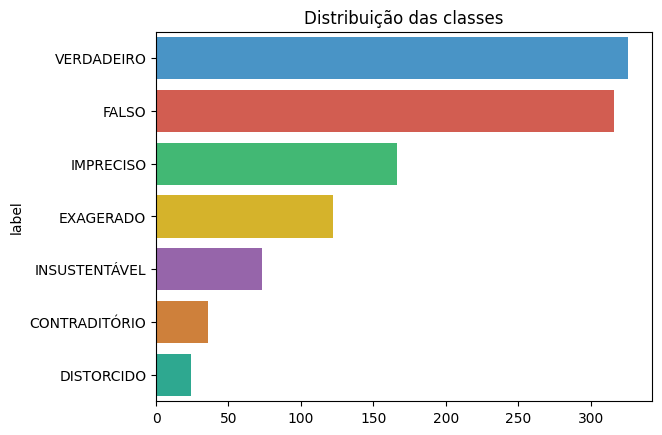

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

# Paleta personalizada com 7 cores
custom_palette = sns.color_palette(["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#9b59b6", "#e67e22", "#1abc9c"])

# DataFrame chamado df_noticias
s = df_noticias['label'].value_counts()

# Exibe um gráfico de barras com a paleta personalizada
sns.barplot(x=s.values, y=s.index, hue=s.index, palette=custom_palette, legend=False)
plt.title('Distribuição das classes')
plt.show()


In [292]:
# Verifica duplicatas
# Havendo linhas duplicadas, avaliar se é o caso de removê-las do dataset
df_noticias.groupby('label').describe()

texto                                                            \
              count unique                                                top   
label                                                                           
CONTRADITÓRIO    36     36  Condicionamos à continuidade do programa Mais ...   
DISTORCIDO       24     24  Qual teria sido o acordo selado entre OEA e PT...   
EXAGERADO       122    122  Quem nos botou nessa dívida interna monstruosa...   
FALSO           316    316  Bolsonaro: Um paciente com câncer custa muito ...   
IMPRECISO       166    166  Quando essa proposta chegou eu estava no Piauí...   
INSUSTENTÁVEL    73     73  Onde foram liberadas as drogas os problemas co...   
VERDADEIRO      326    326  salário integral aos profissionais cubanos hoj...   

                    
              freq  
label               
CONTRADITÓRIO    1  
DISTORCIDO       1  
EXAGERADO        1  
FALSO            1  
IMPRECISO        1  
INSUSTENTÁVEL    1  
VERDADEIRO       1

### Criando um dataset que possui somente as categorias desejadas: Verdadeiro e Falso

In [293]:
import numpy as np

In [294]:
# filtra apenas as categorias desejadas
categorias_desejadas = ['FALSO', 'VERDADEIRO']
df_noticias = df_noticias[df_noticias.label.isin(categorias_desejadas)]
df_noticias.head(5)

,label,texto
0,FALSO,Bolsonaro: Um paciente com câncer custa muito ...
1,FALSO,O programa Mais Médicos além de privilegiar os...
2,FALSO,Raciocinem! Existem apenas duas Universidades ...
3,FALSO,Desabafo em relação ao programa Mais Médicos
4,FALSO,Antônio Carlos de Almeida Castro o Kakay é um ...


In [295]:
# Verifica duplicatas
# Havendo linhas duplicadas, avaliar se é o caso de removê-las do dataset
df_noticias.groupby('label').describe()

texto                                                            \
           count unique                                                top   
label                                                                        
FALSO        316    316  Bolsonaro: Um paciente com câncer custa muito ...   
VERDADEIRO   326    326  salário integral aos profissionais cubanos hoj...   

                 
           freq  
label            
FALSO         1  
VERDADEIRO    1

In [297]:
texto = df_noticias['texto']

## Preparação dos dados para LSTMs

#### Conversão dos datasets em diferentes listas de amostras




In [298]:
from sklearn.model_selection import train_test_split
train = df_noticias['texto']
test = df_noticias['label']

X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)




print('\n{0}\nAmostras de Treinamento\n{1}'.format('=' * 30, '-' * 30))
print(len(X_train))
print('\n{0}\nAmostras de Validação\n{1}'.format('=' * 30, '-' * 30))
print(len(X_test))


Amostras de Treinamento
------------------------------
513

Amostras de Validação
------------------------------
129


In [299]:
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [300]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [301]:
!pip install nltk  # Assuming ntl uses nltk for text processing functionalities
import nltk as ntl
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [302]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming X_train contains raw text data
# 1. Tokenization and Vocabulary Creation
tokenizer = Tokenizer()  # Create a tokenizer object
tokenizer.fit_on_texts(X_train)  # Build vocabulary from training data

# 2. Convert Text to Sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# 3. Pad Sequences
train_input = pad_sequences(X_train_sequences, maxlen=81)
test_input = pad_sequences(X_test_sequences, maxlen=81)

In [303]:
print(tokenizer.word_index)


{'de': 1, 'o': 2, 'a': 3, 'que': 4, 'do': 5, '—': 6, 'e': 7, 'em': 8, 'da': 9, 'para': 10, 'no': 11, 'é': 12, 'um': 13, 'não': 14, 'mais': 15, 'com': 16, 'bolsonaro': 17, 'brasil': 18, 'na': 19, 'se': 20, 'milhões': 21, 'uma': 22, 'foi': 23, 'os': 24, 'pt': 25, 'eu': 26, 'por': 27, 'são': 28, 'r': 29, 'anos': 30, 'haddad': 31, 'mil': 32, 'ele': 33, 'tem': 34, 'lula': 35, 'dos': 36, 'governo': 37, 'as': 38, 'paulo': 39, 'presidente': 40, 'hoje': 41, 'psdb': 42, 'nós': 43, 'ano': 44, 'você': 45, 'à': 46, 'fernando': 47, 'quem': 48, 'já': 49, 'ao': 50, 'país': 51, 'alckmin': 52, 'como': 53, 'está': 54, 'jair': 55, 'gomes': 56, 'sem': 57, 'geraldo': 58, 'das': 59, 'ciro': 60, 'frança': 61, 'temos': 62, 'nunca': 63, 'pdt': 64, 'ou': 65, 'pessoas': 66, 'fui': 67, 'psb': 68, 'márcio': 69, 'rede': 70, 'temer': 71, 'programa': 72, 'dias': 73, 'entre': 74, 'ministro': 75, 'estão': 76, 'sobre': 77, 'homicídios': 78, 'mulheres': 79, 'marina': 80, 'quando': 81, 'nas': 82, 'imposto': 83, 'nos': 84, 

In [304]:
# Verifique as sequências convertidas
print(X_train_sequences)
print(X_test_sequences)

[[962, 56, 963, 964, 2, 25, 7, 965, 1, 148, 16, 3, 401, 1, 31], [296, 966, 166, 967, 8, 968, 969, 297, 9, 192, 970, 6, 80, 70, 70], [576, 13, 402, 1, 13, 577, 4, 971, 46, 193, 57, 972, 7, 167, 403, 105, 105, 973, 576, 404, 974, 66, 578, 402, 1, 975, 4, 405, 579, 10, 976, 1, 580, 406, 1, 580, 407, 118, 298, 234, 6, 14, 977, 20, 298, 234, 6, 167, 581, 22, 978, 2, 408, 402, 14, 119, 6, 582, 235, 8, 583], [50, 979, 584, 30, 1, 236, 3, 980, 981, 3, 106, 299, 5, 87, 585, 3, 43, 982, 20, 983, 168, 984, 7, 409, 985, 169, 586, 585, 986, 194, 410, 987, 988, 2, 4, 12, 300, 10, 38, 170, 47, 31], [15, 587, 26, 989, 2, 42, 10, 411, 5, 990, 5, 588, 27, 301, 5, 412, 991, 992, 6, 195, 1, 149, 71, 10, 58, 52], [13, 302, 589, 50, 993, 44, 994, 2, 107, 590, 14, 196, 995, 65, 996, 13, 591, 88, 150, 234, 88, 171, 234, 303, 997, 592, 1, 998], [2, 593, 999, 23, 594, 9, 304, 5, 197, 88, 67, 413, 40, 5, 42, 118, 33, 23, 594], [45, 196, 595, 198, 8, 28, 39, 1000, 32, 198, 43, 62, 305, 9, 89, 151, 414, 9, 89, 415

In [305]:
# Check the shapes of your input and target data
print("Shape of train_input:", train_input.shape)
print("Shape of test_input:", test_input.shape)



Shape of train_input: (513, 81)
Shape of test_input: (129, 81)


In [306]:
# Verifique as sequências padronizadas
print(train_input)
print(test_input)

[[   0    0    0 ...  401    1   31]
 [   0    0    0 ...   80   70   70]
 [   0    0    0 ...  235    8  583]
 ...
 [   0    0    0 ... 2533    1   35]
 [   0    0    0 ... 2536    2   18]
 [   0    0    0 ...  961   11  363]]
[[   0    0    0 ...  109   96   42]
 [   0    0    0 ...   47   31   25]
 [   0    0    0 ...  275   36   93]
 ...
 [   0    0    0 ...   75    5  350]
 [   0    0    0 ...  219   24   30]
 [   0    0    0 ... 2195   14   12]]


## Modelo Neural



In [307]:
max_length = 0
for texto in df_noticias['texto']:
    # Tokenizar o texto (separar em palavras)
    tokens = texto.split()
    # Atualizar o max_length se o número de tokens for maior
    max_length = max(max_length, len(tokens))

print("Max length:", max_length)

Max length: 81


In [308]:
vocab = set()
for texto in df_noticias['texto']:
    # Adicionar todas as palavras únicas do texto ao conjunto
    for palavra in texto.split():
        vocab.add(palavra)

vocab_size = len(vocab)
print("Vocab size:", vocab_size)

Vocab size: 3328


In [309]:
# Define the LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense # Import the Input layer


embedding_dim = 100

model = Sequential()
model.add(Input(shape=(81,)))
model.add(Embedding(vocab_size, output_dim=embedding_dim))
#model.add(Dense(32))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

## Um alteração poderia ser:

In [310]:
# Define the LSTM model
# embedding_dim = 100
# model = Sequential()
# model.add(Input(shape=(81,)))
# model.add(Embedding(vocab_size, output_dim=embedding_dim))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.5))
# model.add(LSTM(64))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


In [311]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [312]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)             │ (None, 81, 100)             │         332,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 450,177 (1.72 MB)

 Trainable params: 450,177 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

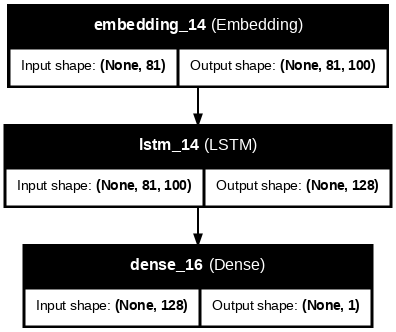

In [313]:
# Plotar a arquitetura do modelo e salvar em um arquivo com resolução ajustada
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plot_model(model, to_file='model_architectureSimples.png', show_shapes=True, show_layer_names=True, dpi=72)

* O comando **`tf.random.set_seed(42) ` **é usado para definir a semente do gerador de números aleatórios no TensorFlow. Isso é importante para garantir a reprodutibilidade dos resultados.

* Quando você define uma semente, o TensorFlow gera a mesma sequência de números aleatórios em execuções subsequentes, o que significa que os resultados do treinamento do modelo serão os mesmos sempre que você executar o código, desde que todos os outros fatores permaneçam constantes.

In [314]:
# Continue with model fitting

import tensorflow as tf

tf.random.set_seed(42)




history = model.fit(train_input, y_train, epochs=20, batch_size=32, shuffle=True,validation_data=(test_input, y_test))

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 397ms/step - accuracy: 0.5087 - loss: 0.6904 - val_accuracy: 0.6589 - val_loss: 0.6773
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 433ms/step - accuracy: 0.8077 - loss: 0.6358 - val_accuracy: 0.6667 - val_loss: 0.6233
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.8638 - loss: 0.4415 - val_accuracy: 0.6744 - val_loss: 0.6215
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.9116 - loss: 0.2252 - val_accuracy: 0.6279 - val_loss: 0.6875
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.9442 - loss: 0.1718 - val_accuracy: 0.6357 - val_loss: 0.6872
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - accuracy: 0.9887 - loss: 0.0669 - val_accuracy: 0.6744 - val_loss: 0.7741
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9970 - loss: 0.0346 - val_accuracy: 0.6434 - val_loss: 0.8731
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.9992 - loss: 0.0199 - val_accuracy: 

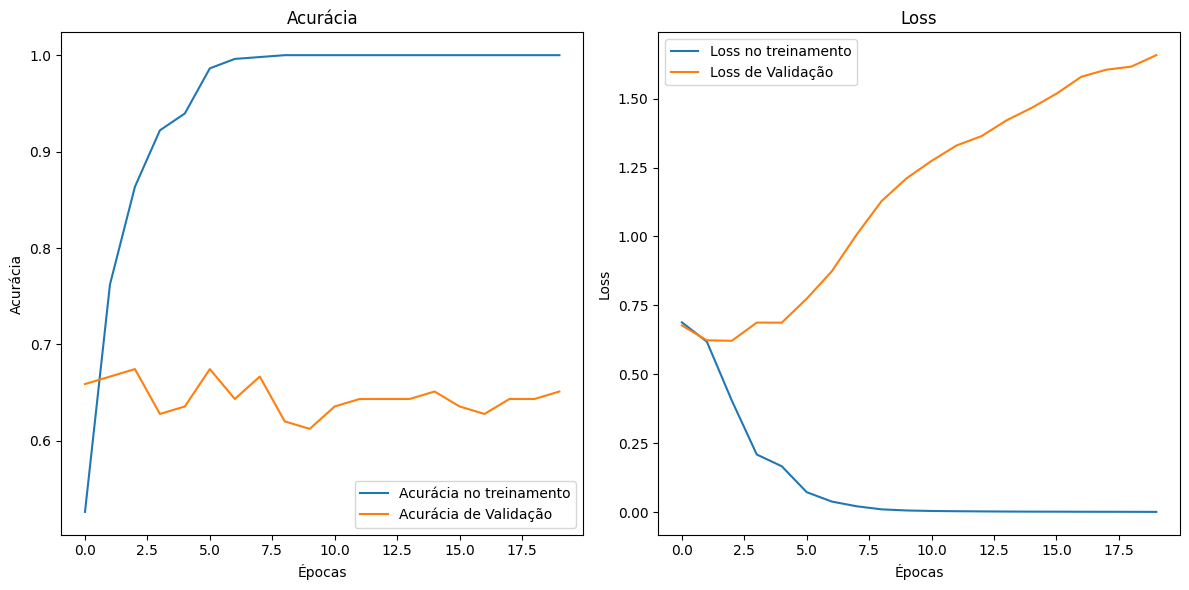

In [316]:
import matplotlib.pyplot as plt
import pandas as pd

# Criar um DataFrame pandas com o histórico de treinamento
history_df = pd.DataFrame(history.history)

# Plotar os gráficos de acurácia (accuracy) e loss
plt.figure(figsize=(12, 6))  # Define o tamanho do gráfico

plt.subplot(1, 2, 1)  # Cria um subplot para o gráfico de acurácia
plt.plot(history_df['accuracy'], label='Acurácia no treinamento')
plt.plot(history_df['val_accuracy'], label='Acurácia de Validação')
plt.title('Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.subplot(1, 2, 2)  # Cria um subplot para o gráfico de loss
plt.plot(history_df['loss'], label='Loss no treinamento')
plt.plot(history_df['val_loss'], label='Loss de Validação')
plt.title('Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()  # Ajusta o layout dos subplots
plt.show()